## TODO

Try PCA on the full table and color based on the class/annotation

In [77]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import Imputer
from keras.utils import to_categorical
import sys

data = pd.read_csv('zfish_dgcr8.feature_table.one_hot_encoding_17.txt', sep='\t')
data.index = range(0, len(data))
data.columns

Index(['slice.1', 'slice.2', 'slice.3', 'slice.4', 'slice.5', 'slice.6',
       'slice.7', 'slice.8', 'slice.9', 'slice.10', 'unique_counts',
       'total_counts', 'mean_read_length', 'cluster_length',
       'relative_coverage_peak_position', 'multiple_peaks',
       'inter_peak_distance', 'mean_read_length_at_max_coverage',
       'average_coverage', 'antisense', 'length.18', 'length.19', 'length.20',
       'length.21', 'length.22', 'length.23', 'length.24', 'length.25',
       'length.26', 'length.27', 'length.28', 'length.29', 'length.30',
       'length.31', 'length.32', 'strucure_length', 'structure_gc',
       'mfe_energy', 'mfe_peak_height', 'mfe_paired_bases', 'mfe_stem_bases',
       'mfe_stem_number', 'stemmy_energy', 'stemmy_peak_height',
       'stemmy_paired_bases', 'stemmy_stem_bases', 'stemmy_stem_number', 'TP',
       'annotation'],
      dtype='object')

In [78]:
# Make dummy variables for annotation
one_hot_data = pd.concat([data, pd.get_dummies(data['annotation'], prefix='annotation')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('annotation', axis=1)

one_hot_data[:10]

data = one_hot_data

In [79]:
# replace YES with 1 and NO with 0 and store to 'y'
label_mapping = {'YES': 1, 'NO': 0}
data = data.replace({'TP': label_mapping})


# drop features - not to be used for prediction
# data = data.drop(['cluster', 'ident2rev_compl_clust', 'num_mism_in_MB', 'num_mismatches_8mer'], axis=1)


# print(data.columns)
# sys.exit()
y = data['TP']
# normalise data
data = (data - data.min()) / (data.max() - data.min())
data

,slice.1,slice.2,slice.3,slice.4,slice.5,slice.6,slice.7,slice.8,slice.9,slice.10,...,annotation_sense_Ensembl_protein_coding_3UTR,annotation_sense_Ensembl_protein_coding_5UTR,annotation_sense_Ensembl_protein_coding_ORF,annotation_sense_Ensembl_protein_coding_intron,annotation_sense_Ensembl_retained_intron_exon,annotation_sense_Ensembl_snoRNA_exon,annotation_sense_RepeatMasker_DNA,annotation_sense_RepeatMasker_rRNA,annotation_sense_mirbase_miRNA,annotation_sense_tRNAScan_tRNA
0,0.000,0.000,0.000,0.026,0.172,0.057,0.214,0.469,0.062,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016,0.234,0.047,0.172,0.516,0.016,0.000,0.000,0.000,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006,0.000,0.012,0.096,0.127,0.283,0.145,0.313,0.018,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004,0.000,0.004,0.149,0.097,0.133,0.395,0.093,0.125,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.032,0.000,0.016,0.000,0.254,0.159,0.032,0.143,0.365,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000,0.208,0.583,0.125,0.042,0.042,0.000,0.000,0.000,0.000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.833,0.000,0.000,0.000,0.000,0.000,0.167,0.000,0.000,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.250,0.679,0.036,0.000,0.000,0.000,0.036,0.000,0.000,0.000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# imputing missing values
# fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
# imputed_DF = pd.DataFrame(fill_NaN.fit_transform(data))
# imputed_DF.columns = data.columns
# data.index = data.index
# data = imputed_DF
# data = data.interpolate(method='spline', order=2) # interpolate missing values
#data = data.fillna(0)

data['TP'] = y



np.random.seed(1453)

# # Split X into training and test sets
sample = np.random.choice(data.index, size=int(len(data)*0.8), replace=False)
train_data, test_data = data.iloc[sample], data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

Number of training samples is 6483
Number of testing samples is 1621


In [81]:
X_train = np.array(train_data.drop('TP', axis=1))
y_train = np.array(keras.utils.to_categorical(train_data['TP'], 2))

X_test = np.array(test_data.drop('TP', axis=1))
y_test = np.array(keras.utils.to_categorical(test_data['TP'], 2))


print("Number of rows in X_train: ", len(X_train))
print("Number of rows in y_train: ", len(y_train))
print("Number of rows in X_test", len(X_test))
print("Number of rows in y_test", len(y_test))

Number of rows in X_train:  6483
Number of rows in y_train:  6483
Number of rows in X_test 1621
Number of rows in y_test 1621


In [82]:
data.columns
# tt = pd.DataFrame(y_train)
# tt.columns = ['c0', 'c1']
# tt.loc[tt['c1'] == 1.0]
# data

Index(['slice.1', 'slice.2', 'slice.3', 'slice.4', 'slice.5', 'slice.6',
       'slice.7', 'slice.8', 'slice.9', 'slice.10', 'unique_counts',
       'total_counts', 'mean_read_length', 'cluster_length',
       'relative_coverage_peak_position', 'multiple_peaks',
       'inter_peak_distance', 'mean_read_length_at_max_coverage',
       'average_coverage', 'antisense', 'length.18', 'length.19', 'length.20',
       'length.21', 'length.22', 'length.23', 'length.24', 'length.25',
       'length.26', 'length.27', 'length.28', 'length.29', 'length.30',
       'length.31', 'length.32', 'strucure_length', 'structure_gc',
       'mfe_energy', 'mfe_peak_height', 'mfe_paired_bases', 'mfe_stem_bases',
       'mfe_stem_number', 'stemmy_energy', 'stemmy_peak_height',
       'stemmy_paired_bases', 'stemmy_stem_bases', 'stemmy_stem_number', 'TP',
       'annotation_NO', 'annotation_Other',
       'annotation_antisense_Ensembl_protein_coding_ORF',
       'annotation_antisense_Ensembl_protein_coding_intr

In [132]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras import regularizers
from keras.metrics import categorical_accuracy

# Building the model

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dropout(.4))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dropout(.4))
# model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(Dropout(.2))
# model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(Dropout(.2))
# model.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
# sgd_optim = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
# adam=keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=[categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 66        
Total params: 6,306
Trainable params: 6,306
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Training the model
# callbacks = [EarlyStopping(monitor='acc', patience=2)] # do not apply without checking
out = model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.1) #, callbacks=callbacks)

Train on 5834 samples, validate on 649 samples
Epoch 1/25
5834/5834 [==============================] - 1s 197us/step - loss: 0.2364 - categorical_accuracy: 0.9458 - val_loss: 0.1802 - val_categorical_accuracy: 0.9507
Epoch 2/25
5834/5834 [==============================] - 0s 25us/step - loss: 0.1769 - categorical_accuracy: 0.9481 - val_loss: 0.1599 - val_categorical_accuracy: 0.9507
Epoch 3/25
5834/5834 [==============================] - 0s 25us/step - loss: 0.1658 - categorical_accuracy: 0.9481 - val_loss: 0.1565 - val_categorical_accuracy: 0.9507
Epoch 4/25
5834/5834 [==============================] - 0s 24us/step - loss: 0.1601 - categorical_accuracy: 0.9479 - val_loss: 0.1516 - val_categorical_accuracy: 0.9507
Epoch 5/25
5834/5834 [==============================] - 0s 25us/step - loss: 0.1574 - categorical_accuracy: 0.9479 - val_loss: 0.1554 - val_categorical_accuracy: 0.9553
Epoch 6/25
5834/5834 [==============================] - 0s 27us/step - loss: 0.1553 - categorical_accuracy:

In [138]:
out.__dict__['history'].keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

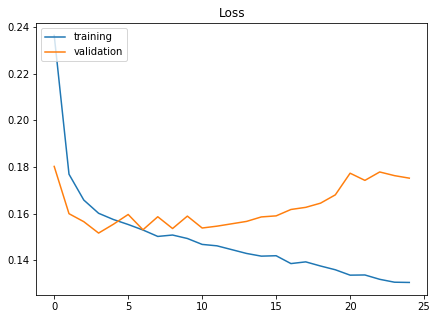

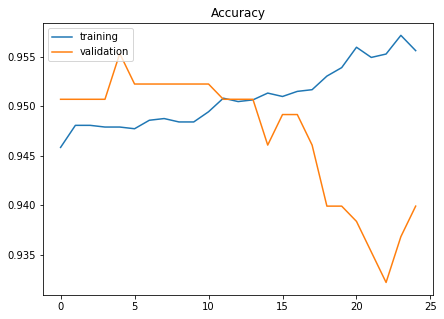

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = np.array(out.__dict__['epoch'])
acc = np.array(out.__dict__['history']['categorical_accuracy'])
loss = np.array(out.__dict__['history']['loss'])
val_acc = np.array(out.__dict__['history']['val_categorical_accuracy'])
val_loss = np.array(out.__dict__['history']['val_loss'])

f = plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='training')
plt.plot(epochs, val_loss, label='validation')
plt.legend(loc='upper left')
plt.title('Loss')

plt.show()

f = plt.figure(figsize=(7,5))
plt.plot(epochs, acc, label='training')
plt.plot(epochs, val_acc, label='validation')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()

f.savefig("train_validation_loss.pdf", bbox_inches='tight')

In [140]:
# Evaluating the model on the training and testing set
train_score = model.evaluate(X_train, y_train, verbose=1)
print("\n Training Accuracy:", train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=1)
print("\n Testing Accuracy:", test_score[1])

6483/6483 [==============================] - 0s 25us/step

 Training Accuracy: 0.957735616291
1621/1621 [==============================] - 0s 25us/step

 Testing Accuracy: 0.946329426354


In [141]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = y.values.argmax

y_pred = model.predict_classes(X_test)

p = model.predict_proba(X_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
print()
TN, FP, FN, TP = confusion_matrix(np.argmax(y_test, axis=1), y_pred).ravel()
print("TP:", TP)
print("FN:", FN)
print("TN:", TN)
print("FP:", FP)
len(p)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1542
          1       0.35      0.11      0.17        79

avg / total       0.93      0.95      0.93      1621

[[1525   17]
 [  70    9]]

TP: 9
FN: 70
TN: 1525
FP: 17


1621

In [142]:
conc = pd.concat([pd.DataFrame(y_test), pd.DataFrame(p)], axis=1)
conc.columns = ['test_0', 'test_1', 'pred_0', 'pred_1']
subdf = conc.loc[conc['test_1'] == 1]
subdf.loc[subdf['pred_1'] >= 0.5]

,test_0,test_1,pred_0,pred_1
43,0.0,1.0,0.438838,0.561162
158,0.0,1.0,0.173436,0.826564
179,0.0,1.0,0.479214,0.520786
276,0.0,1.0,0.440280,0.559720
333,0.0,1.0,0.388781,0.611219
395,0.0,1.0,0.240249,0.759751
584,0.0,1.0,0.227217,0.772783
1178,0.0,1.0,0.458145,0.541855
1619,0.0,1.0,0.309323,0.690677
